<a href="https://colab.research.google.com/github/nikm7777/D-code/blob/main/ECE_595_HW_1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 1**

In [ ]:
### Run this block first to import all necessary libraries ###
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import scipy.stats as st


# 1.
##Using accurate clocks in satellites orbiting the earth, the global positioning system (GPS) may establish the position of a GPS receiver. shows 15 values of the vertical distancement, d (relative to the mean sea level) of a receiver, as determined by using the GPS.  

## ***Displacements***: 120, 108, 132, 125, 118, 106, 115, 103, 117, 120, 142, 129, 123, 127, 128

##**Find the median of the data.**

In [ ]:
d = [120, 108, 132, 125, 118, 106, 115, 103,
                 117, 120, 142, 129, 132, 127, 128]

## Write code below ##
med=np.median(d)
med


120.0

## For the problem above, what is the first quartile of the data

In [ ]:
np.percentile(d,25)

116.0

# The interquartile range is?

In [ ]:
q3, q1 = np.percentile(d, [75 ,25])
iqr = q3 - q1
iqr

12.5

# What is the sample standard deviation?

In [ ]:
np.std(d, ddof=1)

10.776075794268039

# Given the sample average, what is the maxium population average (with 95% confidence)

In [ ]:

st.norm.interval(alpha=0.95, loc=np.mean(d), scale=st.sem(d))

(116.0133200954449, 126.92001323788844)

# How many outliers do we have?

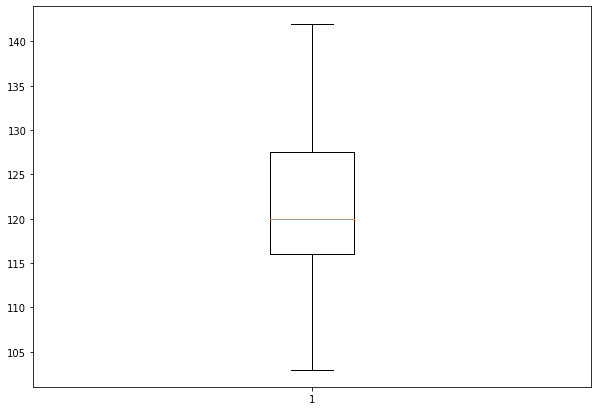

In [ ]:

fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(d)

# show plot
plt.show()

# What is the minimum data value

In [ ]:
min(d)


103

In [ ]:
mean=np.mean(d)
mean

121.46666666666667

2) Consider the dataset posted as HW1 in
https://docs.google.com/spreadsheets/d/1Uhda_NZBVSRHJlzt8UW8z4R9OlfOHubUJJASKRFZe84/edit?usp=sharing

The data is obtained by placing two temperature sensors in a chemical processing chamber and measuring the temperatures for 30 days. We will consider four datasets:
(i)	Combined data from sensor 1 and sensor 2
(ii)	Data from sensor 1 alone
(iii)	Data from sensor 2 alone
(iv)	Daily temperature difference between the sensors.


a)  What are the median and the interquartile range for the datasets?

b)  What are the histogram bin sizes based on the Freedman/Diaconis-2 formula for the datasets?


In [ ]:
s1 = [84.3,84.3,84.5,84.4,84.3,84.1,84.7,84.5,84.2,84.7,
      84.5,84.2,84.3,84.3,84.4,84.8,84,84.4,84.3,84.4,84.4,
      84.2,84.4,84.6,84.1,84.3,84.4,84.6,84.4,84.5]

s2 = [84.6,84.3,84.6,84.7,84.6,84.6,84.9,84.6,84.5,84.7,
      84.4,84.7,84.7,84.4,84.5,84.7,84.4,84.5,84.5,84.4,84.5,
      84.5,84.6,84.7,84.5,84.5,84.6,84.6,84.9,84.9]

d=[560, 540, 570, 550, 560, 660, 580, 570, 550]

s12 = np.append(s1,s2)

s12d = np.asarray(s1) - np.asarray(s2)

med1=np.median(s1)
med2=np.median(s2)
med12=np.median(s12)
med12d=np.median(s12d)
print(f'Medians: {med1},{med2},{med12},{med12d}')


q3, q1 = np.percentile(s1, [75 ,25])
iqr1 = q3 - q1


q3, q1 = np.percentile(s2, [75 ,25])
iqr2 = q3 - q1


q3, q1 = np.percentile(s12, [75 ,25])
iqr12 = q3 - q1


q3, q1 = np.percentile(s12d, [75 ,25])
iqr12d = q3 - q1
print(f'IQR: {iqr1},{iqr2},{iqr12},{iqr12d}')

def freedman_diaconis(data, returnas="width"):
    """
    Use Freedman Diaconis rule to compute optimal histogram bin width.
    ``returnas`` can be one of "width" or "bins", indicating whether
    the bin width or number of bins should be returned respectively.


    Parameters
    ----------
    data: np.ndarray
        One-dimensional array.

    returnas: {"width", "bins"}
        If "width", return the estimated width for each histogram bin.
        If "bins", return the number of bins suggested by rule.
    """
    data = np.asarray(data, dtype=np.float_)
    IQR  = st.iqr(data, rng=(25, 75), scale=1, nan_policy="omit")
    N    = data.size
    bw   = (2 * IQR) / np.power(N, 1/3)

    if returnas=="width":
        result = bw
    else:
        datmin, datmax = data.min(), data.max()
        datrng = datmax - datmin
        result = int((datrng / bw) + 1)
    return(result)

print(f'bin sizes:{freedman_diaconis(data=d, returnas="width")}')



Medians: 84.4,84.6,84.5,-0.19999999999999574
IQR: 0.20000000000000284,0.20000000000000284,0.19999999999998863,0.20000000000000284
bin sizes:19.229994270765445


# 2)
## The turn-on voltages (for a specified current) for 15 diodes are tabulated below.  The following problems will analyze various aspects of the turn-on voltage distribution of the diodes. We will assume that the turn-on voltage is normally distributed.

## ***Data***: [0.638	0.6421	0.6458	0.6395	0.6389	0.6364	0.6411	0.6395	0.639	0.6464	0.642	0.6385	0.6401	0.6432	0.6405]     

## What is the probability that V> 0.64? How many samples of 200 will show this behavior?

In [ ]:
Von = [0.6395, 0.639, 0.6464, 0.642, 0.6385, 0.6401,0.6432, 0.6405,
       0.638, 0.6421, 0.6458, 0.6395, 0.6389, 0.6364, 0.6411]

def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

#Calculate mean and Standard deviation.
mean = np.mean(Von)
sd = np.std(Von)
print(mean,sd)


#Apply function to the data.
pdf = normal_dist(Von,mean,sd)

prob=1-norm(loc = 0.64074 , scale = .0026903944).cdf(0.64)
print(f'prob={prob}')
print(f'n={prob*200}')


0.6407333333333334 0.0026903944361788786
prob=0.6083620900130234
n=121.67241800260469


# b)
## What is the minimum voltage for the 40 diodes that have the highest turn-on voltage? Use the inverse cumulative distribution function to answer this question.

In [ ]:
p=1-40/200

norm.ppf(p, loc=0.6407333333333333, scale=0.0026903944361788786)


0.6429976264175078

# c)
## The original sample contains 15 measurements. The average will be different for a different samples. What is the 99% confidence interval for the average?

In [ ]:
d=[560, 540, 570, 550, 560, 660, 580, 570, 550]
st.norm.interval(alpha=0.95, loc=np.mean(d), scale=st.sem(d))

(547.9102816200655, 594.3119406021567)

In [ ]:
from typing import Any
from scipy.stats import bootstrap
d=[560, 540, 570, 550, 560, 660, 580, 570, 550]
res = bootstrap(d, np.mean, confidence_level=0.95,random_state= Any)
print(res.confidence_interval)


ValueError: ignored

# 3)
## Use Hazen’s formula F_i= (i-3/8)/(n+0.25)  to plot the distribution function. What is the cdf for the 5th data-point?

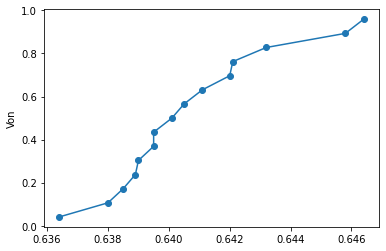

0.30327868852459017

In [ ]:
n=15
h=[]
for i in range(1,16):
  h.append((i-3/8)/(n+0.25))
Von.sort()
import matplotlib.pyplot as plt
plt.plot(Von,h,marker='o')
plt.ylabel('F_i')
plt.ylabel('Von')
plt.show()
h[4]


